In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
df_seq2 = pd.read_csv('../record_for_plot/seq2seq_2layers.csv')
df_mlp = pd.read_csv('../record_for_plot/mlp.csv')[:250]

In [18]:
df_mlp[:250]

,epoch,train_loss,test_loss
0,1,0.982771,1.035089
1,2,0.976917,1.030694
2,3,0.963445,1.019856
3,4,0.960893,1.006422
4,5,0.933816,0.959690
...,...,...,...
245,246,0.673129,0.770093
246,247,0.687370,0.675050
247,248,0.664137,0.756690
248,249,0.679580,0.704493


### loss curve

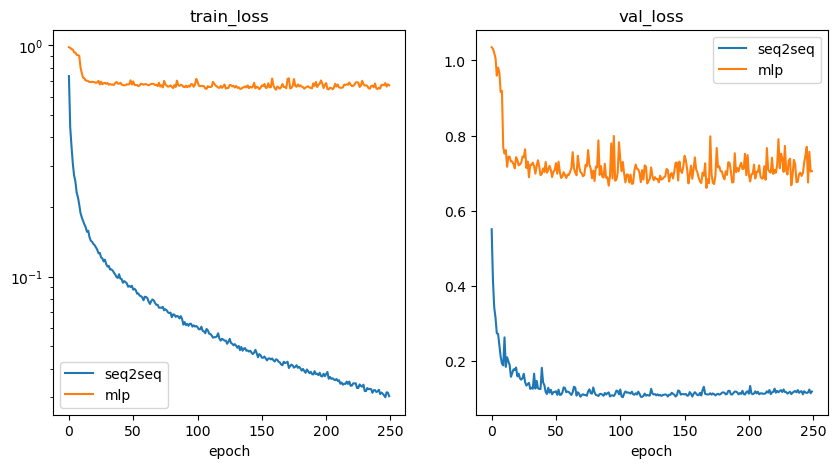

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].set_title('train_loss')
axes[0].plot(df_seq2['train_loss'], label='seq2seq')
axes[0].plot(df_mlp['train_loss'], label='mlp')
axes[0].set_xlabel('epoch')
axes[0].set_yscale('log')
axes[0].legend()

axes[1].set_title('val_loss')
axes[1].plot(df_seq2['test_loss'], label='seq2seq')
axes[1].plot(df_mlp['test_loss'], label='mlp')
axes[1].set_xlabel('epoch')
axes[0].set_yscale('log')
axes[1].legend()

### dataframe for min-max, z-score and mlp

In [1]:
mlp = [68.05, 99.31, 119.18, 99.31, 93.96, 92.51, 86.29, 110.80, 148.35, 29.46]
z_score = [18.59, 45.74, 21.79, 15.74, 19.26, 20.36, 6.40, 201.61, 33.37, 208.70]
min_max = [8.12, 6.18, 2.56, 1.59, 1.70, 0.89, 2.56, 4.72, 2.50, 2.47]

In [7]:
df_random = pd.DataFrame({
    'mlp': mlp,
    'z_score': z_score,
    'min_max': min_max
})
df_random

,mlp,z_score,min_max
0,68.05,18.59,8.12
1,99.31,45.74,6.18
2,119.18,21.79,2.56
3,99.31,15.74,1.59
4,93.96,19.26,1.70
5,92.51,20.36,0.89
6,86.29,6.40,2.56
7,110.80,201.61,4.72
8,148.35,33.37,2.50
9,29.46,208.70,2.47


In [9]:
df_random.min()

mlp        29.46
z_score     6.40
min_max     0.89
dtype: float64

C:\Users\91960\AppData\Local\Temp\ipykernel_23120\2036565503.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i - width, stats_df['mlp'][i] + 1, f"{stats_df['mlp'][i]:.2f}", ha='center', va='bottom')
C:\Users\91960\AppData\Local\Temp\ipykernel_23120\2036565503.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, stats_df['z_score'][i] + 1, f"{stats_df['z_score'][i]:.2f}", ha='center', va='bottom')
C:\Users\91960\AppData\Local\Temp\ipykernel_23120\2036565503.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated

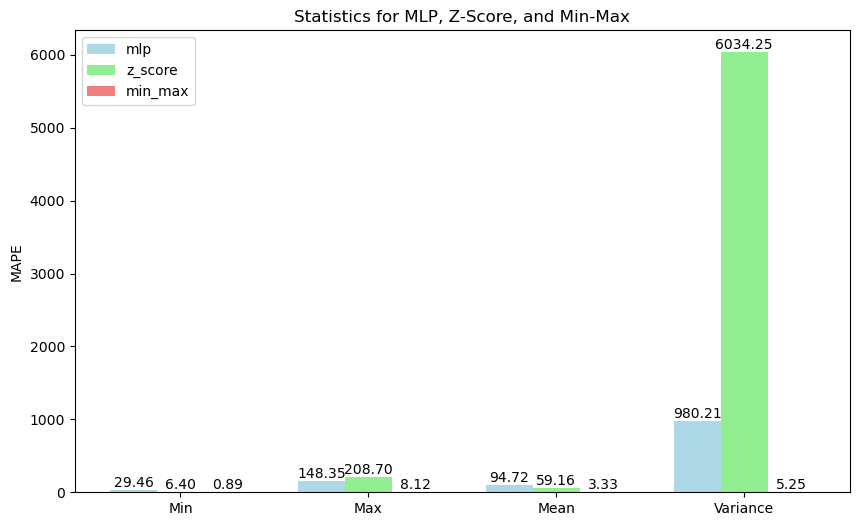

In [16]:
statistics = {
    'min': df_random.min(),
    'max': df_random.max(),
    'mean': df_random.mean(),
    'variance': df_random.var()
}

# Converting statistics to a DataFrame suitable for plotting
stats_df = pd.DataFrame(statistics).T

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(stats_df.index))
width = 0.25

# Plot each category
ax.bar(x - width, stats_df['mlp'], width, label='mlp', color='lightblue')
ax.bar(x, stats_df['z_score'], width, label='z_score', color='lightgreen')
ax.bar(x + width, stats_df['min_max'], width, label='min_max', color='lightcoral')

# Adding text labels above each bar
for i in range(len(stats_df.index)):
    ax.text(i - width, stats_df['mlp'][i] + 1, f"{stats_df['mlp'][i]:.2f}", ha='center', va='bottom')
    ax.text(i, stats_df['z_score'][i] + 1, f"{stats_df['z_score'][i]:.2f}", ha='center', va='bottom')
    ax.text(i + width, stats_df['min_max'][i] + 1, f"{stats_df['min_max'][i]:.2f}", ha='center', va='bottom')

# Set labels and title
ax.set_xticks(x)
ax.set_xticklabels(['Min', 'Max', 'Mean', 'Variance'])
ax.set_ylabel('MAPE')
ax.set_title('Statistics for MLP, Z-Score, and Min-Max')
ax.legend()